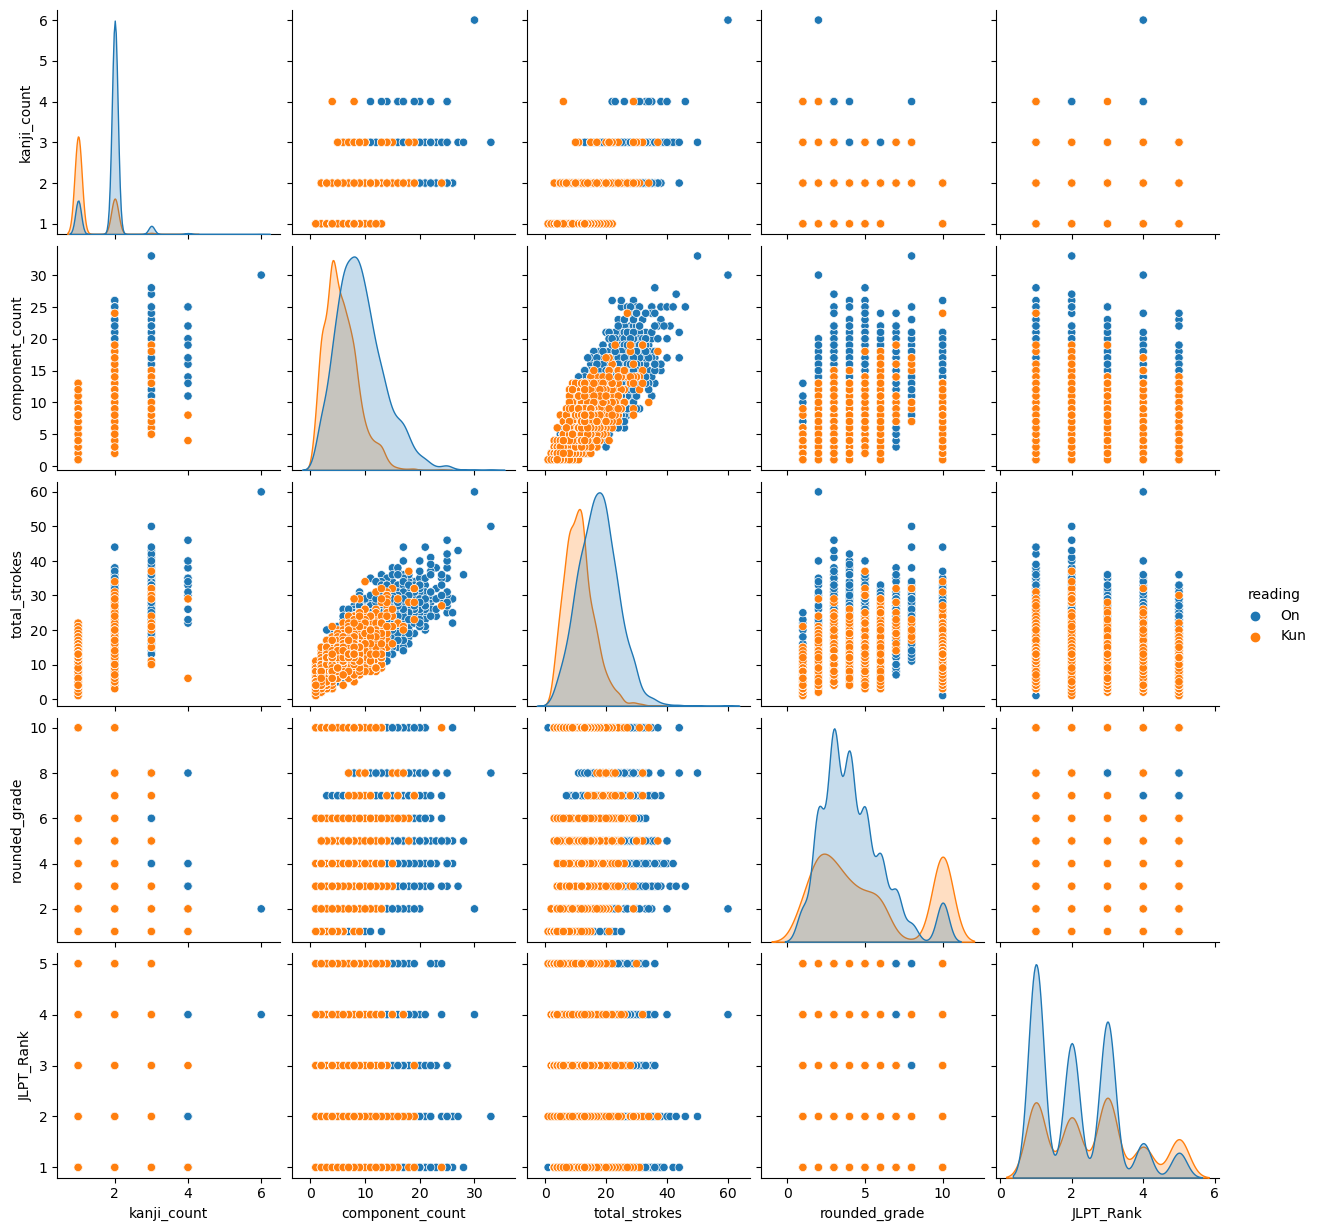

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\migil\Desktop\japanese data.csv")

df.drop('average_grade', axis=1, inplace=True)
df = df[df['reading'] != "Irregular"]
df = df[df['reading'] != "Mixed"]

df=df.sort_values(by=['reading'], ascending=False)
plot_df=df[['kanji_count', 'component_count', 'total_strokes', 'rounded_grade', 'JLPT_Rank', 'reading']]
sns.pairplot(data=plot_df, hue="reading")
plt.show()

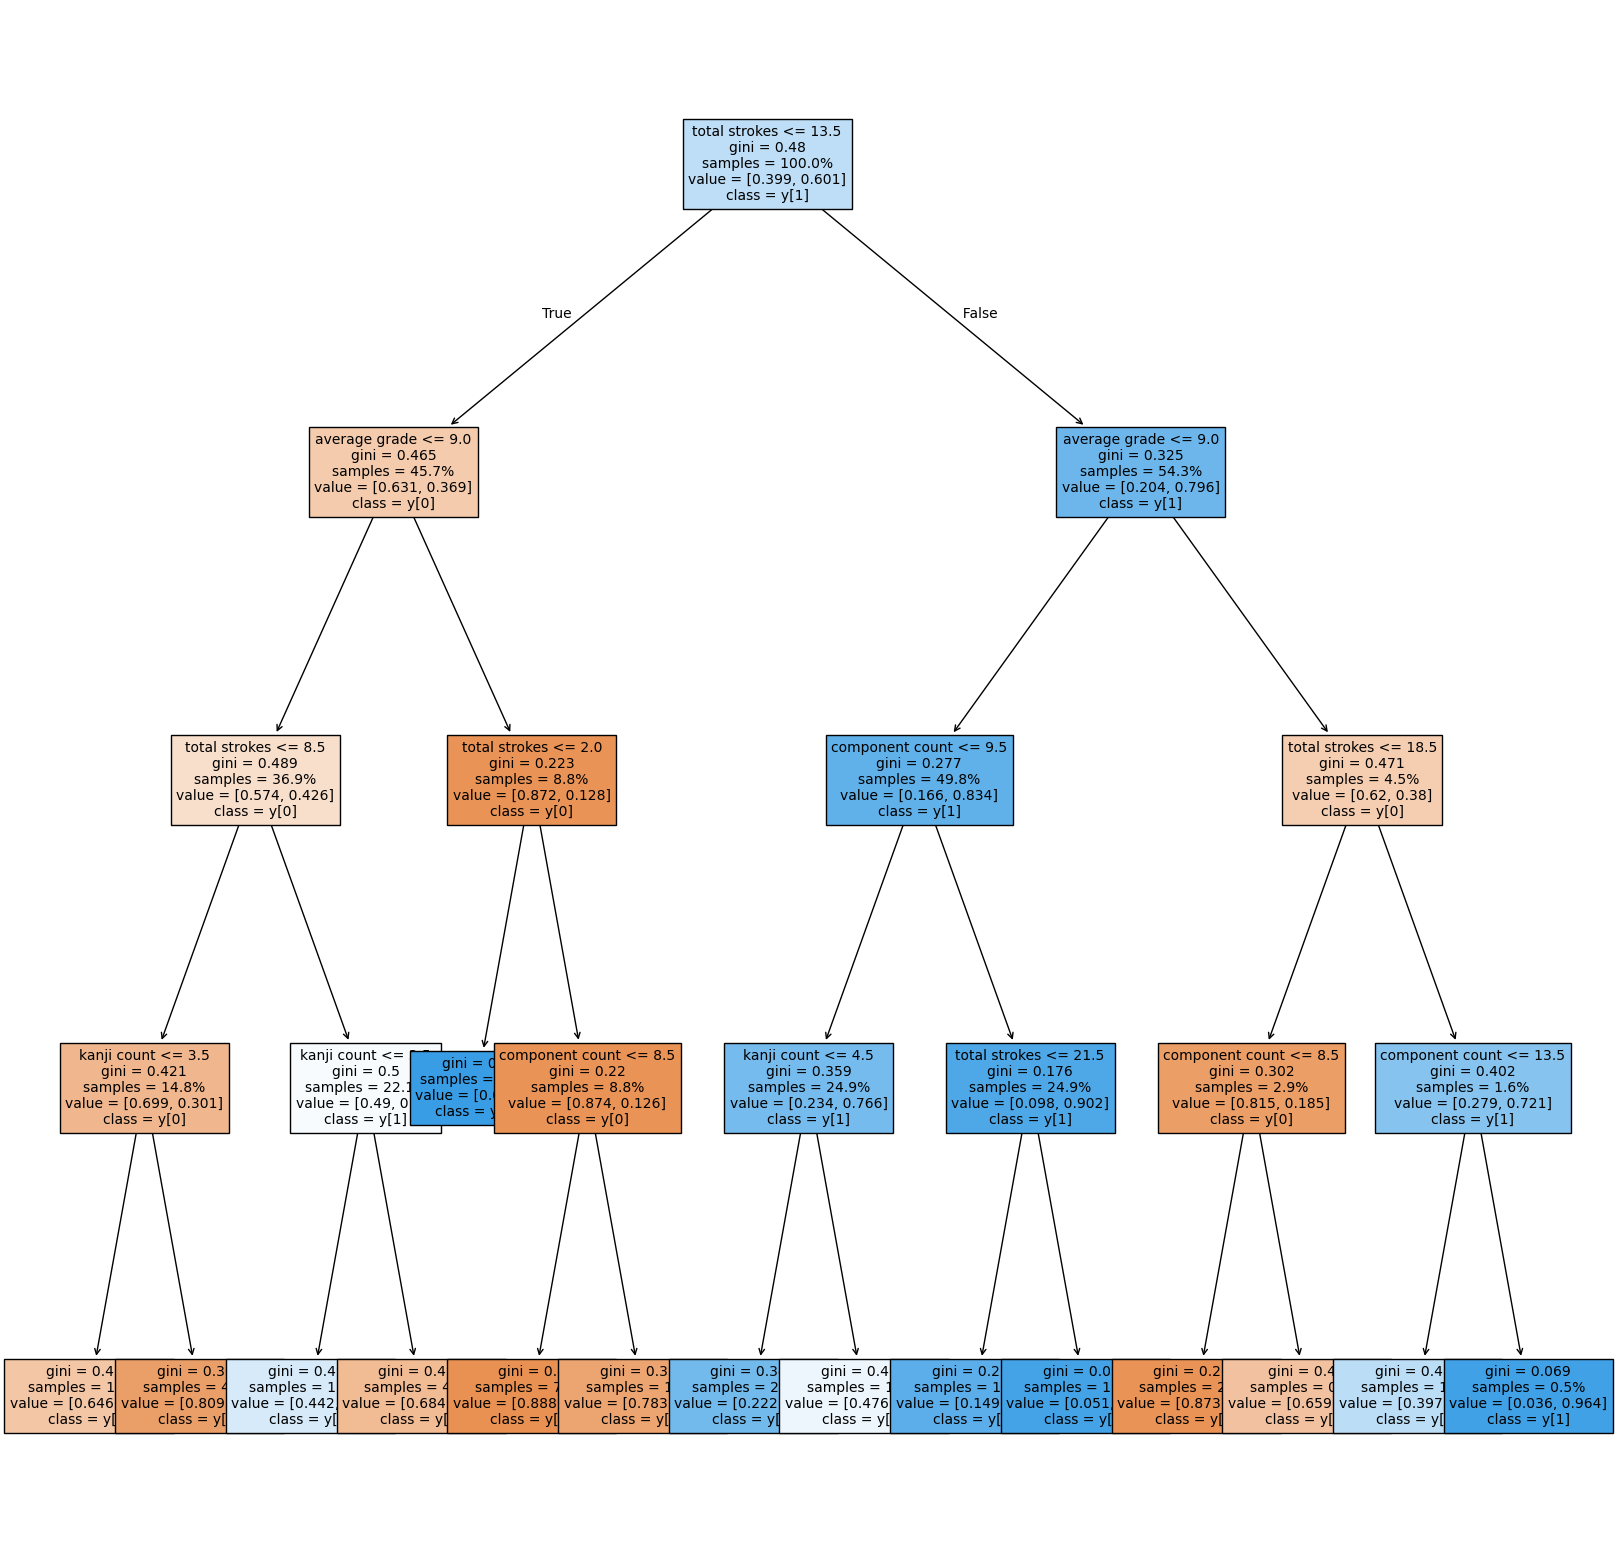

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

X = df[['component_count', 'JLPT_Rank', 'rounded_grade', 'total_strokes']]
y = df['reading']
app_id=df[['id', 'kanji_count']]
X_train, X_test, y_train, y_test, app_id_train, app_id_test = train_test_split(X, y, app_id, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(clf, proportion=True, filled=True, fontsize=10, class_names=True, feature_names=["component count", "kanji count", "average grade", "total strokes", "reading number"])
plt.show()

In [3]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7805810397553516


In [4]:
from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X = df[['component_count', 'JLPT_Rank', 'rounded_grade', 'total_strokes']]
y = df['reading']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
eclf.fit(X_train, y_train)



VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

In [5]:
y_pred = eclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7859327217125383


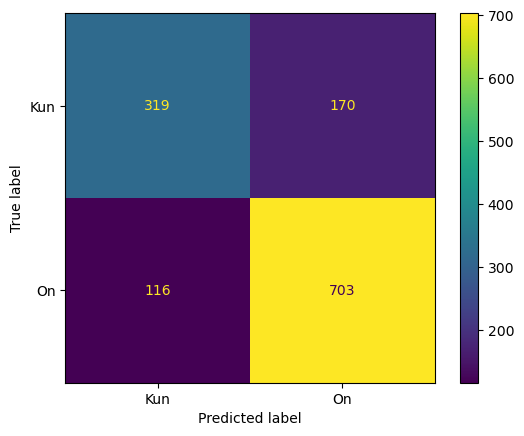

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

ConfusionMatrixDisplay.from_estimator(clf3, X_test, y_test)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [8]:
predictions_log = log_model.predict(X_test)
score = accuracy_score(y_test, predictions_log)
score

0.7744648318042814

In [9]:
df.describe()

,id,component_count,total_grade,rounded_grade,total_strokes,JLPT_Rank
count,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000
mean,3437.500000,7.783660,6.995028,4.589504,15.043299,2.344094
std,1886.925012,4.265269,3.893899,2.618212,6.672223,1.238204
min,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1803.750000,5.000000,4.000000,3.000000,10.000000,1.000000
50%,3437.500000,7.000000,6.000000,4.000000,14.000000,2.000000
75%,5071.250000,10.000000,9.500000,6.000000,19.000000,3.000000
max,6705.000000,33.000000,32.500000,10.000000,60.000000,5.000000


In [146]:
import ipywidgets as widgets
import warnings
from IPython.display import display, clear_output
warnings.simplefilter(action='ignore', category=UserWarning)

dfr = pd.read_csv(r"C:\Users\migil\Desktop\japanese data app resource.csv")

y_pred = eclf.predict(X_test)
results_df= pd.DataFrame({
    'actual': y_test,           
    'predicted': y_pred 
})


jlpt_rank_widget = widgets.IntSlider(description='JLPT Rank', value='0',min=1, max=5)

button_false_predict = widgets.Button( description='False Predictions' )
button_true_predict = widgets.Button( description='True Predictions' )

def on_click_predict(b):

    q=X_test.join(results_df).join(app_id_test).query(f"JLPT_Rank=={jlpt_rank_widget.value}")
    q_predict=q.query(f"{b}")
    app_df=pd.merge(q_predict, dfr, left_on='id', right_on='japanese data id', how='left')
    clear_output(wait=True)
    display(vb)    
    mode_df=pd.DataFrame({
    'feature':   ["predicted",
              "predicted",
              "kanji",
                  "kanji count",
                  "component count",
                  "total strokes",
                  "average grade"],       
    'mode': [app_df['predicted'].value_counts().index[0],
            app_df['predicted'].value_counts().index[1],
               app_df['kanji'].value_counts().index[0],
             app_df['kanji_count'].value_counts().index[0],
              app_df['component_count'].value_counts().index[0],
              app_df['total_strokes'].value_counts().index[0],
              app_df['rounded_grade'].value_counts().index[0]
              
        ],
    'frequency':[app_df['predicted'].value_counts().iloc[0],
                app_df['predicted'].value_counts().iloc[1],
                app_df['kanji'].value_counts().iloc[0],
                 app_df['kanji_count'].value_counts().iloc[0],
             app_df['component_count'].value_counts().iloc[0],
                app_df['total_strokes'].value_counts().iloc[0],
            app_df['rounded_grade'].value_counts().iloc[0]]

})
    filtered_accuracy = accuracy_score(q['actual'], q['predicted'])

    print(f"JLPT {jlpt_rank_widget.value} accuracy: {filtered_accuracy}")
    display(mode_df)

    display(app_df[['kanji', 'kana','meaning', 'actual']])

  
    


    
button_false_predict.on_click(lambda b: on_click_predict("actual!=predicted"))
button_true_predict.on_click(lambda b: on_click_predict("actual==predicted"))

#Displays the text boxes and buttons inside a VBox 
vb=widgets.VBox([
                jlpt_rank_widget,
                button_false_predict,
                button_true_predict,
])
display(vb)

#app_joined
#dfr
#app_joined.join(dfr.set_index(dfr['japanese data id']), on='id')


JLPT 1 accuracy: 0.811816192560175


,feature,mode,frequency
0,predicted,On,302
1,predicted,Kun,76
2,kanji,種,2
3,kanji count,2,297
4,component count,8,42
5,total strokes,17,30
6,average grade,4,76


,kanji,kana,meaning,actual
0,拝借,はいしゃく,(humble) (polite) borrowing,On
1,勧告,かんこく,"advice, counsel",On
2,妨害,ぼうがい,"disturbance, obstruction, interference",On
3,進出,しんしゅつ,advancement,On
4,兆,きざし,"sign, omen, indication",Kun
...,...,...,...,...
373,起点,きてん,starting point,On
374,普遍,ふへん,"universality, ubiquity, omnipresence",On
375,無茶,むちゃ,"absurd, unreasonable",On
376,原点,げんてん,"origin (coordinates, starting point)",On
